In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import f1_score , confusion_matrix , classification_report
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
warnings.simplefilter("ignore")
import import_ipynb

In [2]:
import anvil.server
anvil.server.connect("6YVFJWJDW2HDIPJ5ZNLP7GUI-GEJ45UUSS5GWAWQA")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


# Importation 

In [2]:
telco=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', header=0)
telco=telco.loc[:, telco.columns != 'customerID']
df=telco.copy()
df["TotalCharges"]=pd.to_numeric(df['TotalCharges'],errors='coerce')
df=df.dropna()
df.isna().sum()
df.isna().sum().sum()
df.shape
pd.set_option('display.max_columns', 21)
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def MinMaxNorm(df):
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    for column in df.columns:
        if df.dtypes[column] =='object':
            df[column] =pd.factorize(df[column])[0]
  # scaler = MinMaxScaler()
  # df_fact=scaler.fit_transform(df)
  # df_normM = pd.DataFrame(data=df_fact,columns=list(df.columns))
    #return df_normM

In [4]:
MinMaxNorm(df)
train_set , test_set= train_test_split(df,test_size=0.2,random_state=0)

# Feature Selection 

In [5]:
def preprocessing(df):
    X = df.drop('Churn',axis=1)
    y = df['Churn']
    print(y.value_counts())      
    return X, y

In [6]:
X_train, y_train = preprocessing(train_set)
X_test, y_test = preprocessing(test_set)

0    4125
1    1500
Name: Churn, dtype: int64
0    1038
1     369
Name: Churn, dtype: int64


In [7]:
def evaluation(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    ypred1 = model.predict(X_train)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=6, scoring='f1',
                                              train_sizes=np.linspace(0.1, 1, 10))
    plot_confusion_matrix(model, X_test, y_test,display_labels=df.Churn.unique(),cmap=plt.cm.Blues)
    print('Test')
   # plt.show()
    print(classification_report(y_test, ypred))
    plot_confusion_matrix(model, X_train, y_train,display_labels=df.Churn.unique(),cmap=plt.cm.Reds)
    print('Train')
    #plt.show()
    print(classification_report(y_train, ypred1))    
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

Text(0, 0.5, 'Erreur')

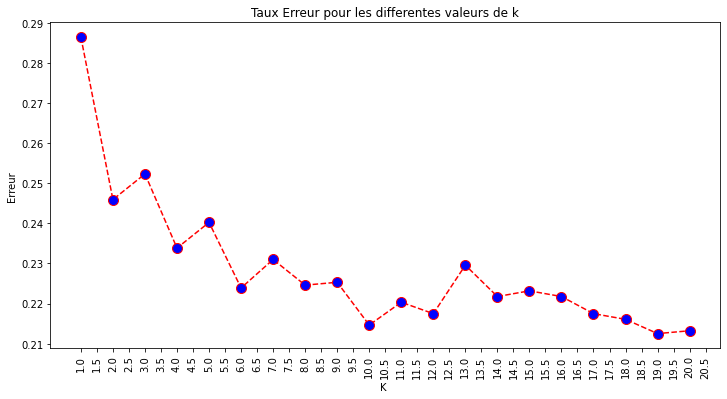

In [8]:
error = []
for i in range(1, 21):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.xticks(np.arange(1, 21, 0.5),rotation=90)
plt.ylabel('Erreur')

## KNeighborsClassifier

In [9]:
model= KNeighborsClassifier(n_neighbors=19,metric="euclidean")
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [10]:
model.score(X_test,y_test)

0.7874911158493249

Test
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1038
           1       0.66      0.40      0.50       369

    accuracy                           0.79      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407

Train
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4125
           1       0.71      0.44      0.54      1500

    accuracy                           0.80      5625
   macro avg       0.77      0.69      0.71      5625
weighted avg       0.79      0.80      0.79      5625



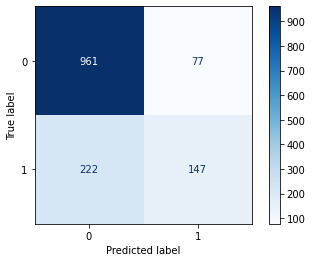

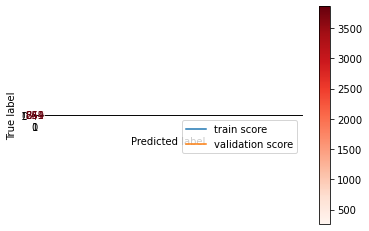

In [11]:
evaluation(model)

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan','Minkowski']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=6)
grid.fit(X_train,y_train)
grid.best_estimator_


KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [13]:
grid.best_score_

0.7845328927856525

In [14]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,20)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=6)
grid.fit(X_train,y_train)
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))
grid.best_score_

0.8101333333333334
0.7960199004975125


0.7889797088653395

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=6)
def evaluation(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    ypred1 = model.predict(X_train)
    print(classification_report(y_test, ypred))
    print(classification_report(y_train, ypred1)) 
evaluation(model)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.66      0.47      0.55       369

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4125
           1       0.69      0.51      0.59      1500

    accuracy                           0.81      5625
   macro avg       0.77      0.72      0.73      5625
weighted avg       0.80      0.81      0.80      5625



In [18]:
from sklearn.tree import DecisionTreeClassifier
grid=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [19]:
from sklearn.neural_network import MLPClassifier
param_grid =  {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid=GridSearchCV(MLPClassifier(),param_grid,cv=6)
grid.fit(X_train,y_train)
grid.best_estimator_

MLPClassifier(hidden_layer_sizes=(20,), learning_rate='adaptive')

In [20]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
modell=logreg_cv.best_estimator_
model=LogisticRegression(C=0.01,penalty='l2')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8064022174042214
0.8074666666666667
0.8009950248756219


In [21]:
from sklearn.tree import DecisionTreeClassifier
model= KNeighborsClassifier(n_neighbors=19,metric="euclidean")
def evaluation(model,gender=1,
               SeniorCitizen=0,
               Partner=1,
               Dependents=0,
               tenure=34,
               PhoneService=1,
               MultipleLines=1, 
               InternetService=0, 
               OnlineSecurity=1,
               OnlineBackup=1, 
               DeviceProtection=1,
               TechSupport=0,
               StreamingTV=0,
               StreamingMovies=0,
               Contract=1, 
               PaperlessBilling=1, 
               PaymentMethod=1,
               MonthlyCharges=56.95,
               TotalCharges=1889.50):
    model.fit(X_train, y_train)
    x=np.array([gender, SeniorCitizen, Partner, Dependents, tenure,
       PhoneService, MultipleLines, InternetService, OnlineSecurity,
       OnlineBackup, DeviceProtection, TechSupport, StreamingTV,
       StreamingMovies, Contract, PaperlessBilling, PaymentMethod,
       MonthlyCharges, TotalCharges]).reshape(1,19)
    if(model.predict(x))==0:
        print('No Churn')
    else:
         print(' Churn')
    

In [22]:
evaluation(model)

No Churn


In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
